[View in Colaboratory](https://colab.research.google.com/github/nahtehck/EIP2/blob/master/3A.ipynb)

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


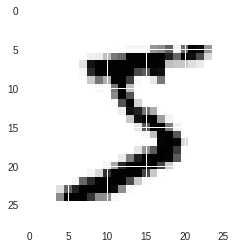

In [44]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [47]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [49]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(26, 19, 19, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(26, (19, 19), activation="relu", input_shape=(28, 28, 1...)`
  """


In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 10, 10, 26)        9412      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 10)        270       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 19,692
Trainable params: 19,692
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [53]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.2356 - acc: 0.9297
Epoch 2/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.1040 - acc: 0.9684
Epoch 3/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.0817 - acc: 0.9747
Epoch 4/20
60000/60000 [==============================] - 15s 256us/step - loss: 0.0692 - acc: 0.9786
Epoch 5/20
60000/60000 [==============================] - 17s 289us/step - loss: 0.0601 - acc: 0.9812
Epoch 6/20
60000/60000 [==============================] - 18s 300us/step - loss: 0.0526 - acc: 0.9838
Epoch 7/20
60000/60000 [==============================] - 18s 299us/step - loss: 0.0459 - acc: 0.9856
Epoch 8/20
60000/60000 [==============================] - 18s 299us/step - loss: 0.0428 - acc: 0.9866
Epoch 9/20
60000/60000 [==============================] - 18s 299us/step - loss: 0.0365 - acc: 0.9886
Epoch 10/20
60000/60000 [==============================] - 17s 286us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [55]:
print(score)

[0.0983780114592079, 0.9813]


In [0]:
y_pred = model.predict(X_test)

In [57]:
print(y_pred[:9])
print(y_test[:9])

[[1.33414472e-18 1.56386857e-15 2.74901033e-13 3.19578275e-09
  7.16703897e-25 2.61860082e-20 3.51201064e-35 1.00000000e+00
  3.36986516e-18 5.64523146e-13]
 [4.55748042e-14 2.06826205e-20 1.00000000e+00 2.07933212e-10
  3.73360457e-32 1.00584734e-27 4.78770037e-25 2.12353682e-21
  6.12635488e-21 1.15568061e-34]
 [2.67981753e-17 9.99993801e-01 7.50692948e-08 1.56390387e-11
  1.27865265e-08 5.48964298e-15 9.76361526e-12 2.72927148e-09
  6.13000429e-06 3.23101168e-16]
 [1.00000000e+00 2.39742124e-22 9.92503909e-12 2.24800223e-14
  6.15940786e-17 3.46313343e-12 6.89584001e-10 1.07430595e-14
  5.94359546e-15 5.72037528e-10]
 [1.14644860e-12 1.41902333e-25 4.20328959e-19 3.96891146e-24
  9.99716103e-01 2.92908146e-25 2.21500159e-13 3.00517172e-07
  5.28016517e-16 2.83567060e-04]
 [2.61416810e-19 9.99999046e-01 2.38126563e-09 4.73994691e-14
  2.89838020e-09 1.46868270e-19 1.33335551e-17 2.49294718e-09
  1.00926650e-06 6.43763992e-16]
 [2.89155975e-34 1.68104395e-26 3.05884792e-22 4.61262117e

In [58]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_7': <keras.layers.convolutional.Conv2D object at 0x7fc41c103160>, 'conv2d_8': <keras.layers.convolutional.Conv2D object at 0x7fc41c199320>, 'conv2d_9': <keras.layers.convolutional.Conv2D object at 0x7fc41c199be0>, 'flatten_3': <keras.layers.core.Flatten object at 0x7fc41c23e2b0>, 'activation_3': <keras.layers.core.Activation object at 0x7fc41c23ebe0>}


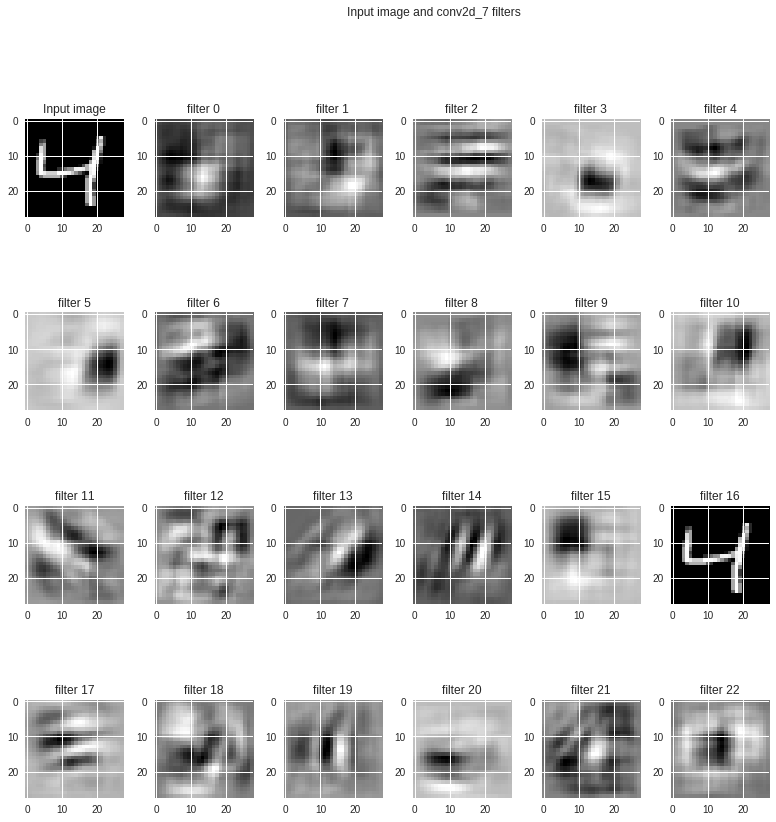

In [60]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_7'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()